## Import các thư viện cần thiết

In [1]:
import matplotlib.pyplot as plt
from bert_score import score
import pandas as pd
import seaborn as sns

c:\Users\xuanv\miniconda3\envs\llm_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Tải các tập evaluation đã được trả lời

In [2]:
vinallama_df = pd.read_csv("./eval_vinallama-7b.csv")
vistral_df = pd.read_csv("./eval_vistral-7b.csv")

y = list(range(1,140))

### Mô hình Vinallama:7b

In [3]:
vinallama_df.head(10)

,question,answer,contexts,ground_truth
0,Gói FlavorLock™ là gì?,Gói FlavorLock™ là một gói kín khí được sử dụn...,['Gói FlavorLock™ là gì?\nCông nghệ FlavorLock...,Công nghệ FlavorLock™ độc đáo của chúng tôi sử...
1,Tôi nên sử dụng loại cà phê xay nào?,Bắt đầu với cà phê nguyên hạt và xay mới cho m...,['Tôi nên sử dụng loại cà phê xay nào?\nĐể có ...,Để có được loại cà phê có hương vị thơm ngon n...
2,Cách bảo quản cà phê tốt nhất là gì?,"Mua cà phê hàng tuần, bảo quản trong thùng chứ...",['Câu hỏi thường gặp về Chuẩn bị Cà phê\nCách ...,"Khi được rang, cà phê bắt đầu mất mùi khi tiếp..."
3,Cà phê sẽ tươi trong bao lâu?,Cà phê đựng trong túi FlavorLock™ chưa mở sẽ t...,['Câu hỏi thường gặp về Chuẩn bị Cà phê\nCách ...,Cà phê đựng trong túi FlavorLock™ chưa mở sẽ t...
4,Thẻ Starbucks là gì?,Thẻ Starbucks là một thẻ nhựa vật lý mang thươ...,['Thẻ Starbucks là một thẻ nhựa vật lý mang th...,Thẻ Starbucks là một thẻ vật lý mang thương hi...
5,Tôi có thể nhận Thẻ Starbucks ở đâu?,Thẻ Starbucks có sẵn tại tất cả cửa hàng Starb...,['Câu hỏi thường gặp chương trình Starbucks Re...,Thẻ Starbucks có sẵn tại tất cả cửa hàng Starb...
6,Làm thế nào để tôi kích hoạt Thẻ Starbucks?,Thẻ Starbucks phải được kích hoạt với giá trị ...,['Câu hỏi thường gặp chương trình Starbucks Re...,Thẻ Starbucks phải được kích hoạt với giá trị ...
7,Tôi có thể sử dụng Thẻ Starbucks của mình ở đâu?,Thẻ Starbucks được chấp nhận tại tất cả cửa hà...,['Thẻ Starbucks có sẵn tại tất cả cửa hàng Sta...,Thẻ Starbucks được chấp nhận tại tất cả cửa hà...
8,Tôi có thể sử dụng Thẻ Starbucks của mình khi ...,Thẻ Starbucks được kích hoạt tại Việt Nam chỉ ...,['Thẻ Starbucks có sẵn tại tất cả cửa hàng Sta...,Thẻ Starbucks được kích hoạt tại Việt Nam chỉ ...
9,Làm thế nào để tôi đăng ký Thẻ Starbucks?,Bạn có thể đăng ký Thẻ Starbucks một cách dễ d...,['Làm thế nào để tôi đăng ký Thẻ Starbucks?\nB...,Bạn có thể đăng ký Thẻ Starbucks một cách dễ d...


### Mô hình Vistral:7b

In [4]:
vistral_df.head(10)

,question,answer,contexts,ground_truth
0,Gói FlavorLock™ là gì?,Gói FlavorLock™ là một công nghệ độc đáo được ...,['Gói FlavorLock™ là gì?\nCông nghệ FlavorLock...,Công nghệ FlavorLock™ độc đáo của chúng tôi sử...
1,Tôi nên sử dụng loại cà phê xay nào?,Để có được hương vị thơm ngon nhất từ hạt cà p...,['Tôi nên sử dụng loại cà phê xay nào?\nĐể có ...,Để có được loại cà phê có hương vị thơm ngon n...
2,Cách bảo quản cà phê tốt nhất là gì?,Cách bảo quản cà phê tốt nhất là mua hàng tuần...,['Câu hỏi thường gặp về Chuẩn bị Cà phê\nCách ...,"Khi được rang, cà phê bắt đầu mất mùi khi tiếp..."
3,Cà phê sẽ tươi trong bao lâu?,Cà phê đựng trong túi FlavorLock™ chưa mở có t...,['Câu hỏi thường gặp về Chuẩn bị Cà phê\nCách ...,Cà phê đựng trong túi FlavorLock™ chưa mở sẽ t...
4,Thẻ Starbucks là gì?,Thẻ Starbucks là một thẻ nhựa vật lý mang thươ...,['Thẻ Starbucks là một thẻ nhựa vật lý mang th...,Thẻ Starbucks là một thẻ vật lý mang thương hi...
5,Tôi có thể nhận Thẻ Starbucks ở đâu?,Thẻ Starbucks có sẵn tại tất cả cửa hàng Starb...,['Câu hỏi thường gặp chương trình Starbucks Re...,Thẻ Starbucks có sẵn tại tất cả cửa hàng Starb...
6,Làm thế nào để tôi kích hoạt Thẻ Starbucks?,Thẻ Starbucks phải được kích hoạt với giá trị ...,['Câu hỏi thường gặp chương trình Starbucks Re...,Thẻ Starbucks phải được kích hoạt với giá trị ...
7,Tôi có thể sử dụng Thẻ Starbucks của mình ở đâu?,Thẻ Starbucks được chấp nhận tại tất cả cửa hà...,['Thẻ Starbucks có sẵn tại tất cả cửa hàng Sta...,Thẻ Starbucks được chấp nhận tại tất cả cửa hà...
8,Tôi có thể sử dụng Thẻ Starbucks của mình khi ...,Thẻ Starbucks được kích hoạt tại Việt Nam chỉ ...,['Thẻ Starbucks có sẵn tại tất cả cửa hàng Sta...,Thẻ Starbucks được kích hoạt tại Việt Nam chỉ ...
9,Làm thế nào để tôi đăng ký Thẻ Starbucks?,Bạn có thể đăng ký Thẻ Starbucks một cách dễ d...,['Làm thế nào để tôi đăng ký Thẻ Starbucks?\nB...,Bạn có thể đăng ký Thẻ Starbucks một cách dễ d...


## Sử dụng BERT_SCORE để tính [ Precision , Recall , F1 Score ] của mô hình Vistral:7b

In [5]:
candidates = vistral_df["answer"].values.tolist()
references = vistral_df["ground_truth"].values.tolist()

vistral_P, vistral_R, vistral_F1 = score(cands=candidates, refs=references, lang="vi", verbose=True)

print(f"Precision: {vistral_P.mean()}")
print(f"Recall: {vistral_R.mean()}")
print(f"F1 Score: {vistral_F1.mean()}")

calculating scores...
computing bert embedding.


100%|██████████| 5/5 [00:24<00:00,  4.91s/it]


computing greedy matching.


100%|██████████| 3/3 [00:00<00:00, 18.87it/s]

done in 24.73 seconds, 5.62 sentences/sec
Precision: 0.9192428588867188
Recall: 0.9266583323478699
F1 Score: 0.9219090342521667


#### Trực quan hóa F1 Score của mô hình Vistral:7b

[Text(0.5, 1.0, 'Sơ đồ phân phối F1 Score của mô hình Vistral')]

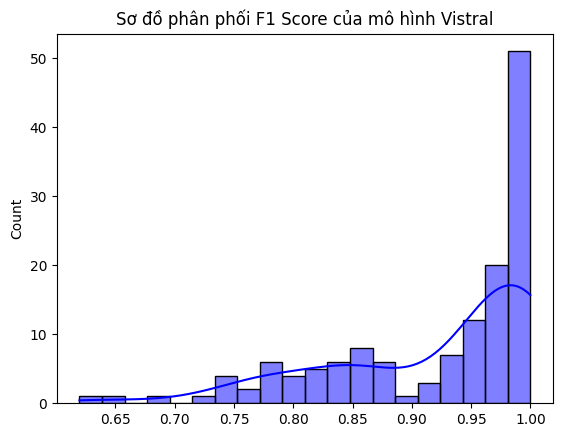

In [ ]:
sns.histplot(data=vistral_F1, kde=True, bins=20, color="blue").set(title="Sơ đồ phân phối F1 Score của mô hình Vistral")

[Text(0.5, 1.0, 'Biểu đồ đường của F1 Score')]

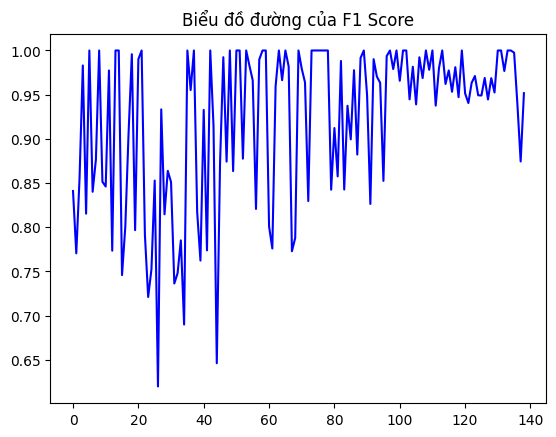

In [7]:
sns.lineplot(data=vistral_F1, color="blue").set(title="Biểu đồ đường của F1 Score")

[Text(0.5, 1.0, 'Biểu đồ phân phối của F1 Score')]

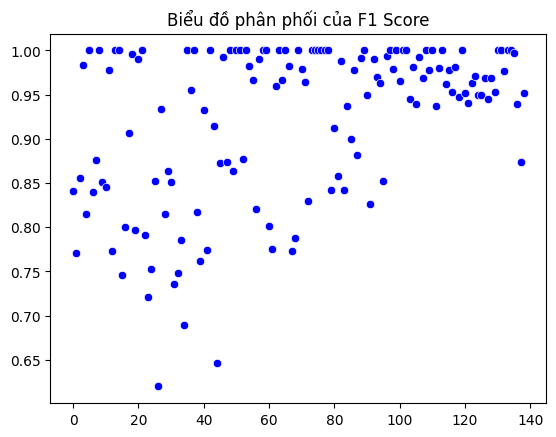

In [8]:
sns.scatterplot(vistral_F1, color="blue").set(title="Biểu đồ phân phối của F1 Score")

#### Trực quan hóa Precision của mô hình Vistral:7b

[Text(0.5, 1.0, 'Sơ đồ phân phối Precision của mô hình Vistral')]

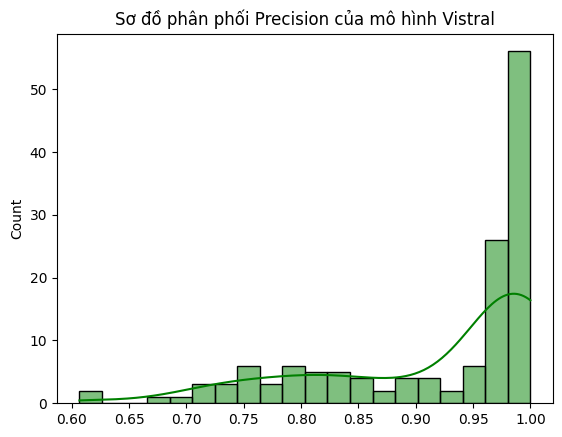

In [9]:
sns.histplot(data=vistral_P, kde=True, bins=20, color="green").set(title="Sơ đồ phân phối Precision của mô hình Vistral")

[Text(0.5, 1.0, 'Biểu đồ đường của Precision')]

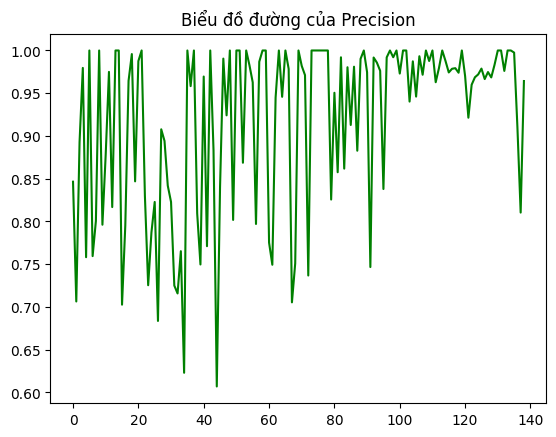

In [10]:
sns.lineplot(data=vistral_P, color="green").set(title="Biểu đồ đường của Precision")

[Text(0.5, 1.0, 'Biểu đồ phân phối của Precision')]

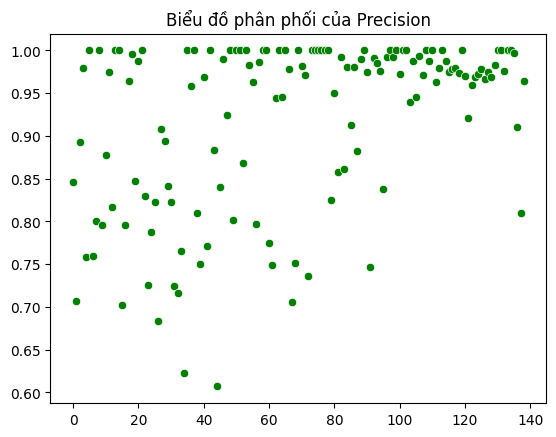

In [11]:
sns.scatterplot(data=vistral_P, color="green").set(title="Biểu đồ phân phối của Precision")

#### Trực quan hóa Recall của mô hình Vistral:7b



[Text(0.5, 1.0, 'Sơ đồ phân phối Recall của mô hình Vistral')]

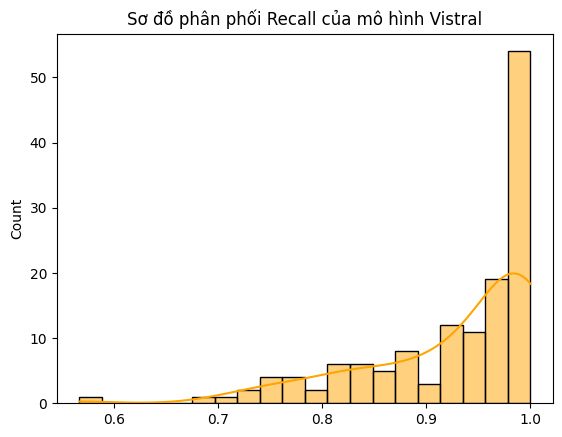

In [12]:
sns.histplot(data=vistral_R, kde=True, bins=20, color="orange").set(title="Sơ đồ phân phối Recall của mô hình Vistral")

[Text(0.5, 1.0, 'Biểu đồ đường của Recall')]

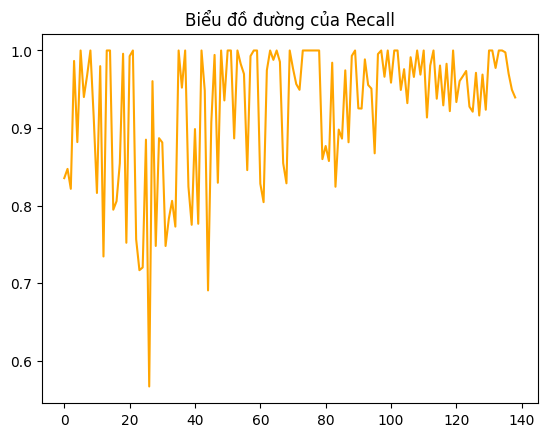

In [13]:
sns.lineplot(data=vistral_R, color="orange").set(title="Biểu đồ đường của Recall")

[Text(0.5, 1.0, 'Biểu đồ phân phối của Recall')]

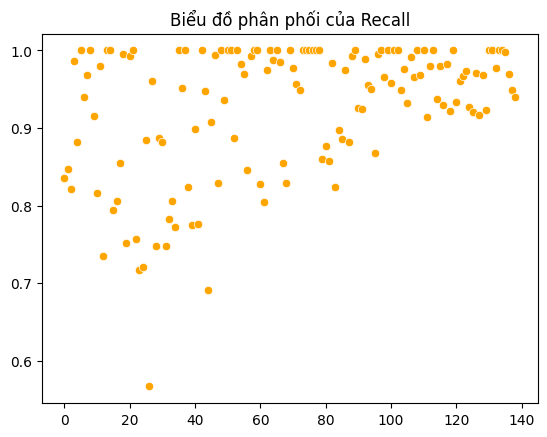

In [14]:
sns.scatterplot(data=vistral_R, color="orange").set(title="Biểu đồ phân phối của Recall")

## Sử dụng BERT_SCORE để tính [ Precision , Recall , F1 Score ] của mô hình Vinallama:7b

In [15]:
candidates = vinallama_df["answer"].values.tolist()
references = vinallama_df["ground_truth"].values.tolist()

vinallama_P, vinallama_R, vinallama_F1 = score(cands=candidates, refs=references, lang="vi", verbose=True)

print(f"Precision: {vinallama_P.mean()}")
print(f"Recall: {vinallama_R.mean()}")
print(f"F1 Score: {vinallama_F1.mean()}")

calculating scores...
computing bert embedding.


100%|██████████| 4/4 [00:19<00:00,  4.82s/it]


computing greedy matching.


100%|██████████| 3/3 [00:00<00:00, 40.00it/s]

done in 19.38 seconds, 7.17 sentences/sec
Precision: 0.9245673418045044
Recall: 0.8798763155937195
F1 Score: 0.900580644607544


#### Trực quan hóa F1 Score của mô hình Vinallama:7b

[Text(0.5, 1.0, 'Sơ đồ phân phối F1 Score của mô hình Vinallama')]

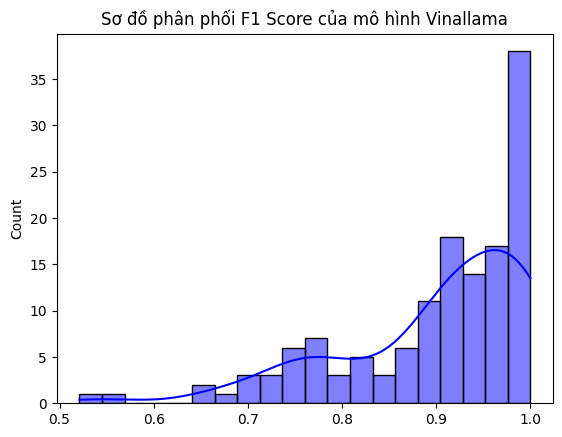

In [16]:
sns.histplot(data=vinallama_F1, kde=True, bins=20, color="blue").set(title="Sơ đồ phân phối F1 Score của mô hình Vinallama")

[Text(0.5, 1.0, 'Biểu đồ đường của F1 Score')]

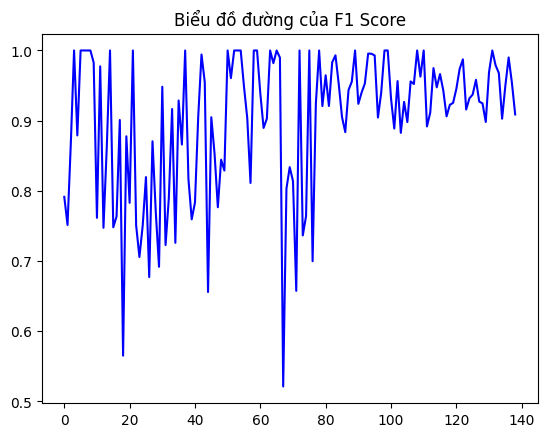

In [17]:
sns.lineplot(data=vinallama_F1, color="blue").set(title="Biểu đồ đường của F1 Score")

[Text(0.5, 1.0, 'Biểu đồ phân phối của F1 Score')]

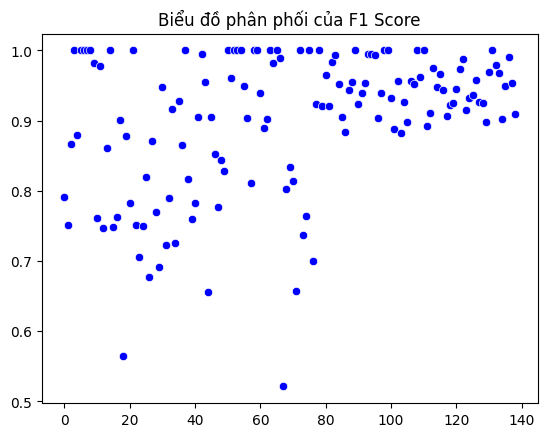

In [18]:
sns.scatterplot(data=vinallama_F1, color="blue").set(title="Biểu đồ phân phối của F1 Score")

#### Trực quan hóa Precision của mô hình Vinallama:7b

[Text(0.5, 1.0, 'Sơ đồ phân phối Precision của mô hình Vinallama')]

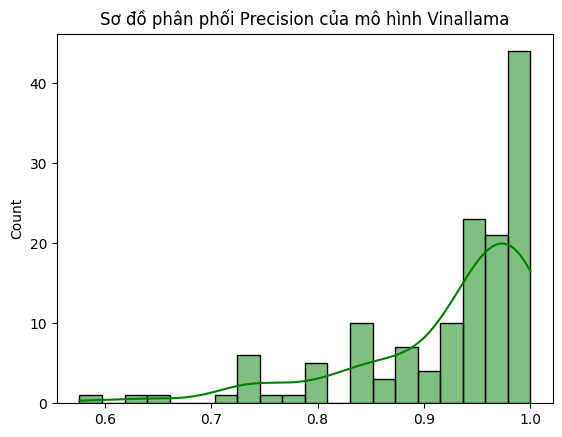

In [19]:
sns.histplot(data=vinallama_P, kde=True, bins=20, color="green").set(title="Sơ đồ phân phối Precision của mô hình Vinallama")

[Text(0.5, 1.0, 'Biểu đồ đường của Precision')]

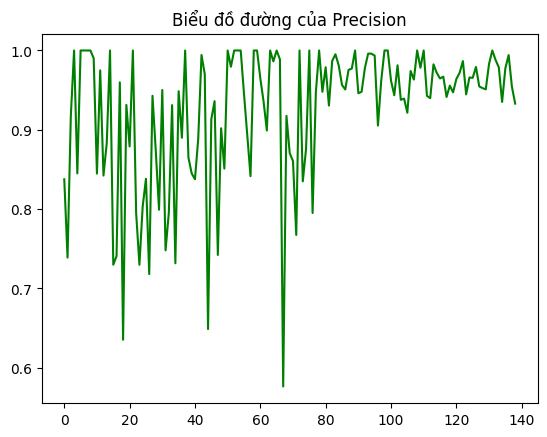

In [20]:
sns.lineplot(data=vinallama_P, color="green").set(title="Biểu đồ đường của Precision")

[Text(0.5, 1.0, 'Biểu đồ phân phối Precision của mô hình Vinallama')]

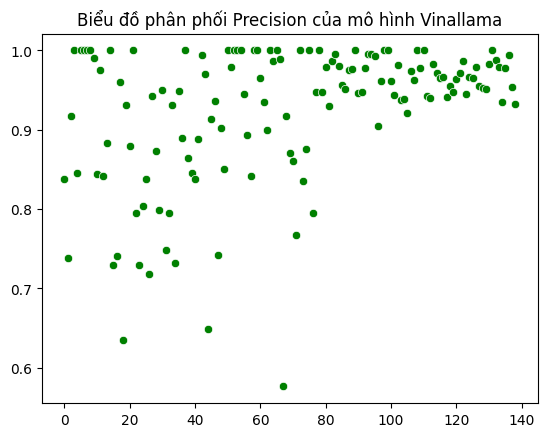

In [21]:
sns.scatterplot(data=vinallama_P, color="green").set(title="Biểu đồ phân phối Precision của mô hình Vinallama")

#### Trực quan hóa Recall của mô hình Vinallama:7b

[Text(0.5, 1.0, 'Sơ đồ phân phối Recall của mô hình Vinallama')]

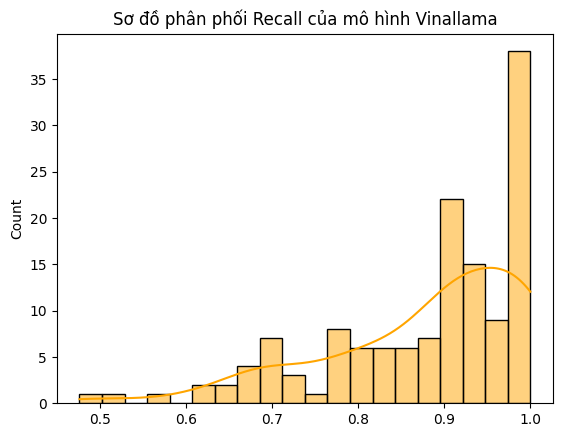

In [22]:
sns.histplot(data=vinallama_R, kde=True, bins=20, color="orange").set(title="Sơ đồ phân phối Recall của mô hình Vinallama")

[Text(0.5, 1.0, 'Biểu đồ đường của Recall')]

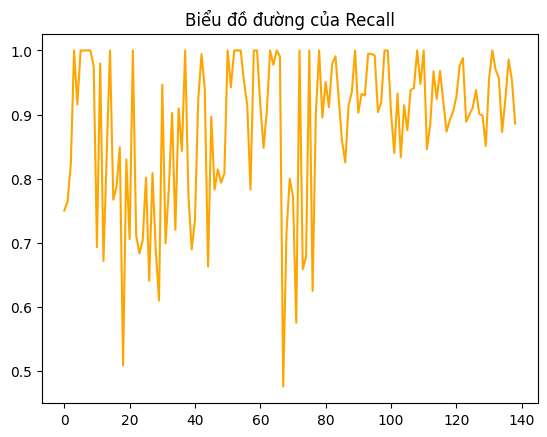

In [23]:
sns.lineplot(data=vinallama_R, color="orange").set(title="Biểu đồ đường của Recall")

[Text(0.5, 1.0, 'Biểu đồ phân phối của Recall')]

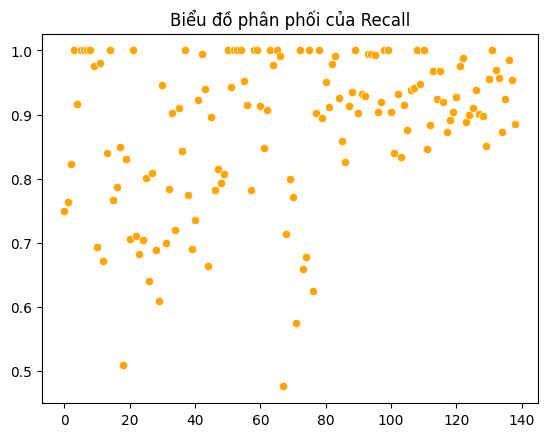

In [24]:
sns.scatterplot(data=vinallama_R, color="orange").set(title="Biểu đồ phân phối của Recall")